**Import Library**

In [280]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

**Data Understanding**

In [281]:
dataset = pd.read_csv('./lang_scores.csv')
dataset

,Unnamed: 0,Reading,Listening,Speaking,Writing,LangLevel
0,0,0.15,0.38,0.22,0.24,1
1,1,0.06,0.06,0.02,0.35,1
2,2,0.24,0.28,0.01,0.39,1
3,3,0.33,0.08,0.05,0.07,1
4,4,0.12,0.21,0.13,0.12,1
...,...,...,...,...,...,...
295,295,0.99,0.87,0.93,0.99,3
296,296,0.82,0.99,0.94,0.81,3
297,297,0.86,0.94,0.81,0.92,3
298,298,0.87,0.92,0.81,0.97,3


In [282]:
dataset.describe()

,Unnamed: 0,Reading,Listening,Speaking,Writing,LangLevel
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,0.505433,0.512200,0.465733,0.519967,2.006667
std,86.746758,0.275526,0.275298,0.280242,0.277404,0.809613
min,0.000000,0.000000,0.000000,0.010000,0.010000,1.000000
25%,74.750000,0.310000,0.287500,0.220000,0.297500,1.000000
50%,149.500000,0.525000,0.520000,0.440000,0.570000,2.000000
75%,224.250000,0.730000,0.750000,0.690000,0.742500,3.000000
max,299.000000,1.000000,0.990000,0.990000,1.000000,3.000000


In [283]:
dataset.isnull().sum()

Unnamed: 0    0
Reading       0
Listening     0
Speaking      0
Writing       0
LangLevel     0
dtype: int64

In [284]:
dataset.dtypes

Unnamed: 0      int64
Reading       float64
Listening     float64
Speaking      float64
Writing       float64
LangLevel       int64
dtype: object

In [285]:
dataset.drop('LangLevel', axis = 1, inplace = True)
dataset.drop('Unnamed: 0', axis = 1, inplace = True)

In [286]:
dataset

,Reading,Listening,Speaking,Writing
0,0.15,0.38,0.22,0.24
1,0.06,0.06,0.02,0.35
2,0.24,0.28,0.01,0.39
3,0.33,0.08,0.05,0.07
4,0.12,0.21,0.13,0.12
...,...,...,...,...
295,0.99,0.87,0.93,0.99
296,0.82,0.99,0.94,0.81
297,0.86,0.94,0.81,0.92
298,0.87,0.92,0.81,0.97


**Modelling**

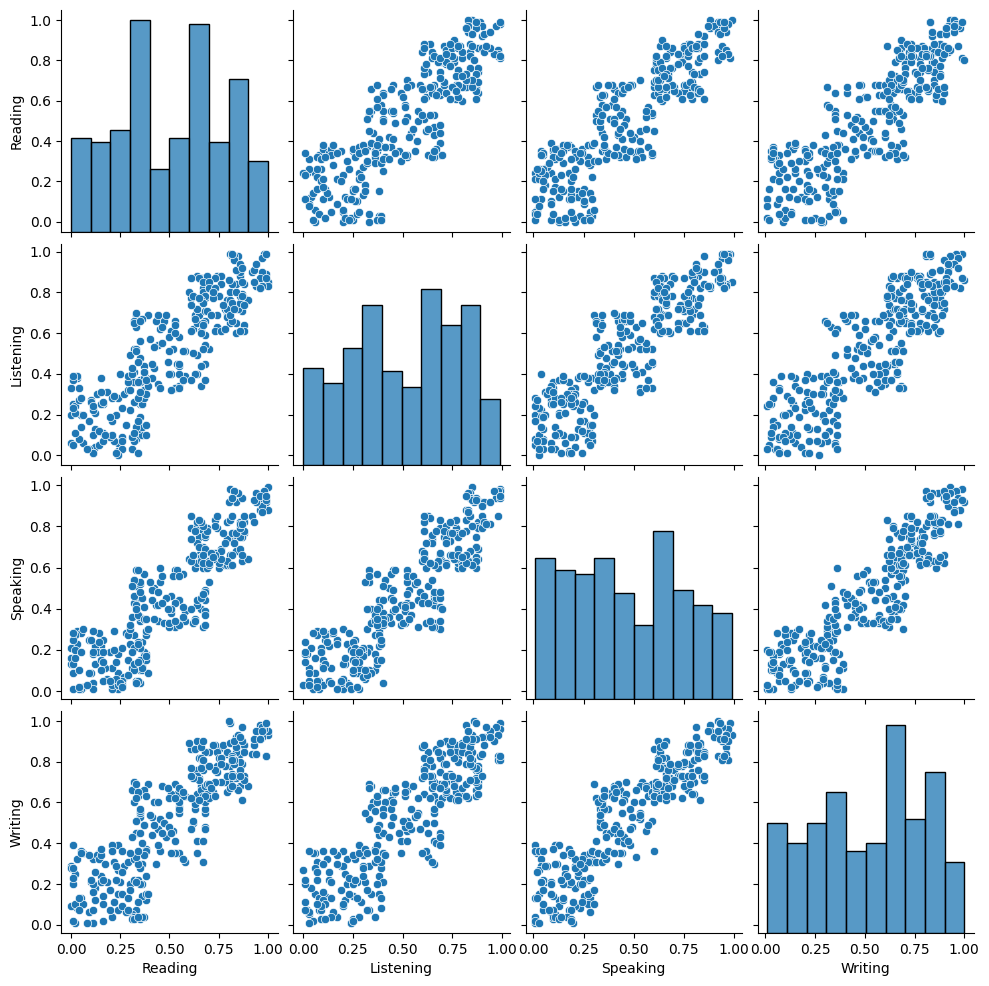

In [287]:
sns.pairplot(dataset)

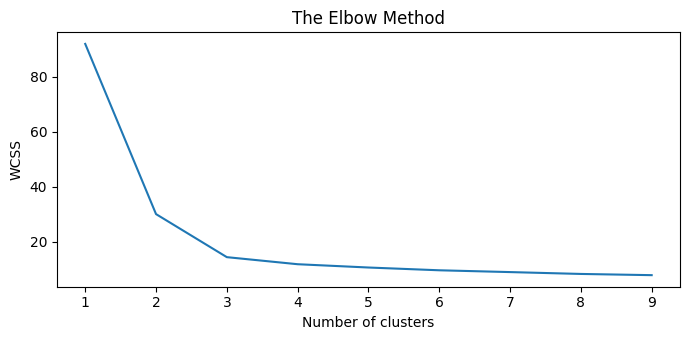

In [288]:
from sklearn.cluster import KMeans
wcss=[]

# asumsi jumlah K berada di antara 1 sampai 10
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [289]:
from sklearn.cluster import KMeans

# menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)

# fitting input data
kmeans = kmeans.fit(dataset)

# mendapatkan cluster labels
labels = kmeans.predict(dataset)

# mendapatkan nilai centroid
centroids = kmeans.cluster_centers_

In [290]:
centroids

array([[0.1992    , 0.197     , 0.1495    , 0.1952    ],
       [0.484     , 0.504     , 0.43011765, 0.52694118],
       [0.78756522, 0.79234783, 0.76704348, 0.79721739]])

In [291]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(dataset)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [292]:
dataset

,Reading,Listening,Speaking,Writing
0,0.15,0.38,0.22,0.24
1,0.06,0.06,0.02,0.35
2,0.24,0.28,0.01,0.39
3,0.33,0.08,0.05,0.07
4,0.12,0.21,0.13,0.12
...,...,...,...,...
295,0.99,0.87,0.93,0.99
296,0.82,0.99,0.94,0.81
297,0.86,0.94,0.81,0.92
298,0.87,0.92,0.81,0.97


In [293]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(dataset, labels)

0.5214291368050235

**Visualization**

<AxesSubplot:xlabel='Speaking', ylabel='Writing'>

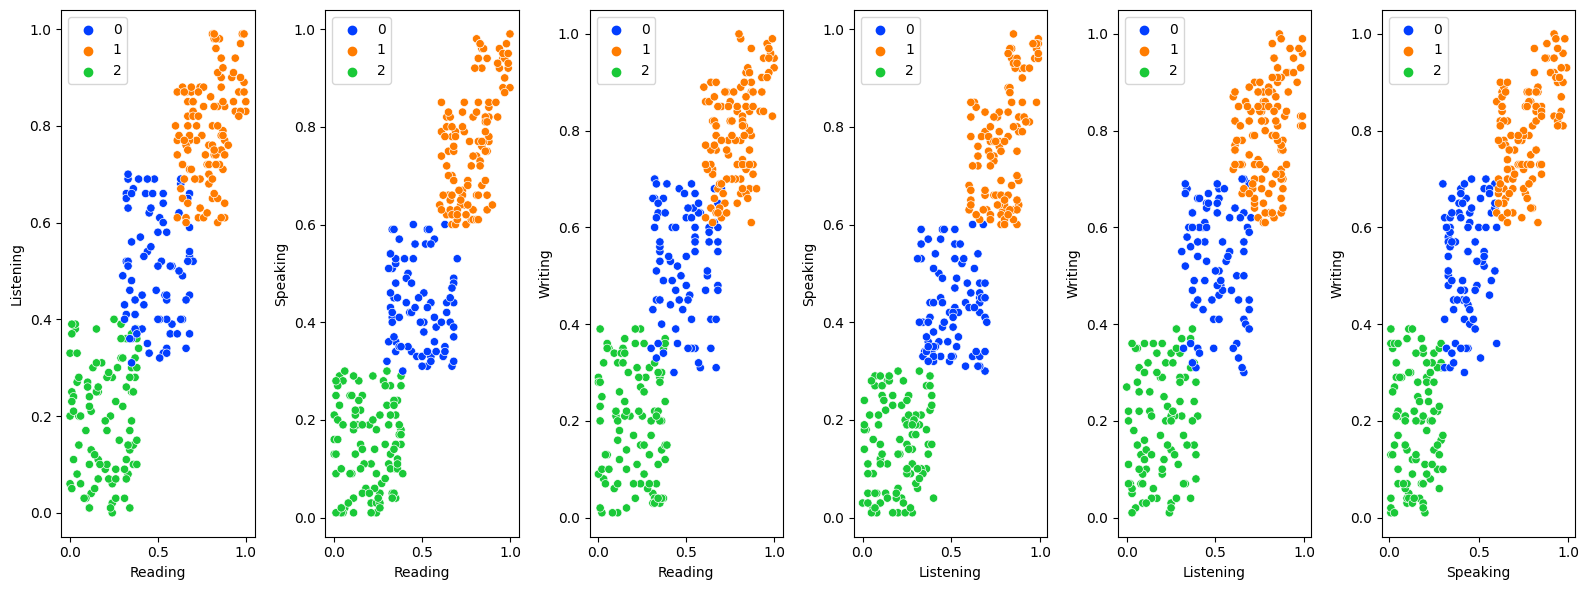

In [294]:
# Plot for each 2 columns
import warnings 
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(1, 6, figsize=(16, 6))
palette = sns.color_palette('bright', 5)
sns.scatterplot(x='Reading', y='Listening', hue=y_kmeans, palette=palette, data=dataset, ax=ax[0])
sns.scatterplot(x='Reading', y='Speaking', hue=y_kmeans, palette=palette, data=dataset, ax=ax[1])
sns.scatterplot(x='Reading', y='Writing', hue=y_kmeans, palette=palette, data=dataset, ax=ax[2])
sns.scatterplot(x='Listening', y='Speaking', hue=y_kmeans, palette=palette, data=dataset, ax=ax[3])
sns.scatterplot(x='Listening', y='Writing', hue=y_kmeans, palette=palette, data=dataset, ax=ax[4])
sns.scatterplot(x='Speaking', y='Writing', hue=y_kmeans, palette=palette, data=dataset, ax=ax[5])


In [295]:
dataset['Cluster'] = y_kmeans

In [296]:
#jumlah anggota masing-masing cluster
dataset['Cluster'].value_counts()

1    115
2    100
0     85
Name: Cluster, dtype: int64

In [297]:
dataset.dtypes

Reading      float64
Listening    float64
Speaking     float64
Writing      float64
Cluster        int32
dtype: object

In [298]:
dataset

,Reading,Listening,Speaking,Writing,Cluster
0,0.15,0.38,0.22,0.24,2
1,0.06,0.06,0.02,0.35,2
2,0.24,0.28,0.01,0.39,2
3,0.33,0.08,0.05,0.07,2
4,0.12,0.21,0.13,0.12,2
...,...,...,...,...,...
295,0.99,0.87,0.93,0.99,1
296,0.82,0.99,0.94,0.81,1
297,0.86,0.94,0.81,0.92,1
298,0.87,0.92,0.81,0.97,1


In [299]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))